## Enunciado Trabajo Práctico 3

Simulación del modulador en banda base y el canal.


### Objetivo

Familiarizarse con las tareas que realiza el modulador de banda base y
con el modelo del canal y sus características.


### Descripción

Se tiene el siguiente sistema:

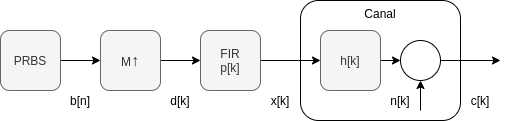



Considere un periodo de muestreo de $T_s = \frac{1}{16}\mu\text{s}$ y un
tiempo de símbolo $T_\text{symb}$ de 16 veces $T_s$.
![energy.png](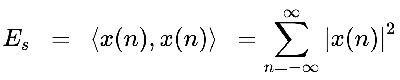![energy.png](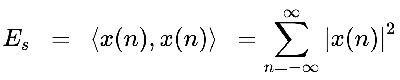![raised_cosine.png](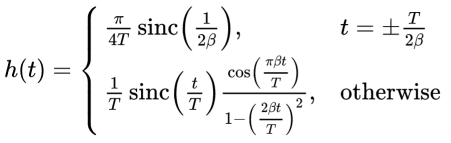![energy.png](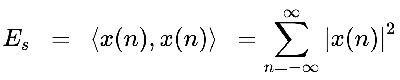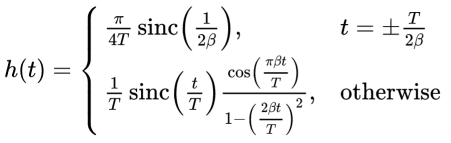))))


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

##################################################################
# Parámetros PRBS
tipo_binario = True # True = 0 y 1 ; False = -1 y 1
periodo_muestreo = 1/16  # en microsegundos
tiempo_simbolo = 16 * periodo_muestreo  # 1 microsegundo
##################################################################

1. Generar un script de *octave*, *python*, *matlab*, o cualquier otro lenguaje
    similar que implemente el sistema.

- La señal `b` es una secuencia binaria aleatoria. Toma los valores `0` y `1` (o alternativamente `-1` y `1`).

In [ ]:
n_binarios = 16

def generar_numero_binario(tipo_binario):
    if tipo_binario:
        return random.choice([0, 1])
    else:
        return random.choice([-1, 1])

# Generar 16 números binarios según el tipo especificado
PRBS = [generar_numero_binario(tipo_binario) for _ in range(n_binarios)]
# PRBS = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
print(PRBS)

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]


  - La señal `d` inserta $M-1$ ceros entre cada bit y luego le asigna un `1.0` al bit `1` y un `-1.0` al bit `0` (o `-1`).

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0

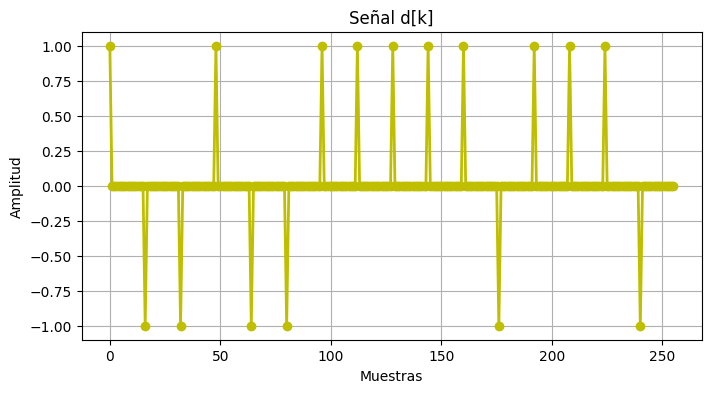

In [ ]:
# Parametros M
M = 16

d_k = []

for val in PRBS:
    if val == 1 :
        d_k.append(1.0)
    if val == 0 :
        d_k.append(-1.0)
    d_k.extend([0.0] * (M-1))

d_k = np.array(d_k)

print(d_k)


plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(d_k)), d_k, 'y-', marker= 'o', linewidth=2)
plt.title('Señal d[k]')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

Puede tomar los vaores `-1`, `0` o `1`.

Todos los pulsos deben tener un pico de altura 1.

- El pulso `p` puede tener varias formas:

  1. Pulso cuadrado.

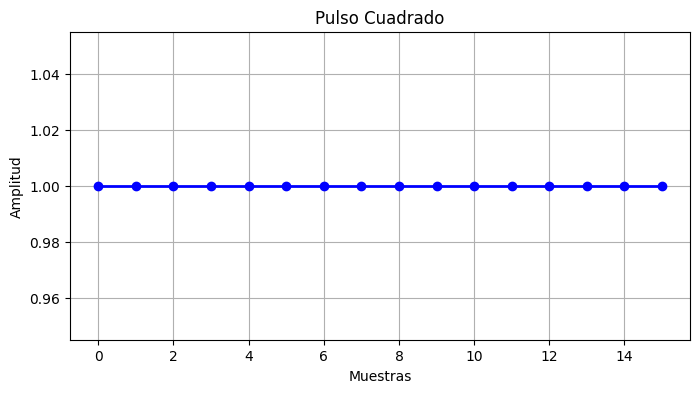

In [ ]:
def pulso_cuadrado(X):
    # Creamos un vector de tiempo de 0 a X-1
    t = np.arange(X)

    # Calculamos el pulso cuadrado
    pulso = np.where((t % 1) < 1 / 2, 1, -1)

    descarte = int(np.ceil((M-1)/2))

    return t, pulso, descarte

p_cuadrado = pulso_cuadrado(M)
t, p_k, dscr = p_cuadrado


plt.figure(figsize=(8, 4))
plt.plot(t, p_k, 'b-', marker= 'o', linewidth=2)
plt.title('Pulso Cuadrado')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

  2. Pulso triangular.

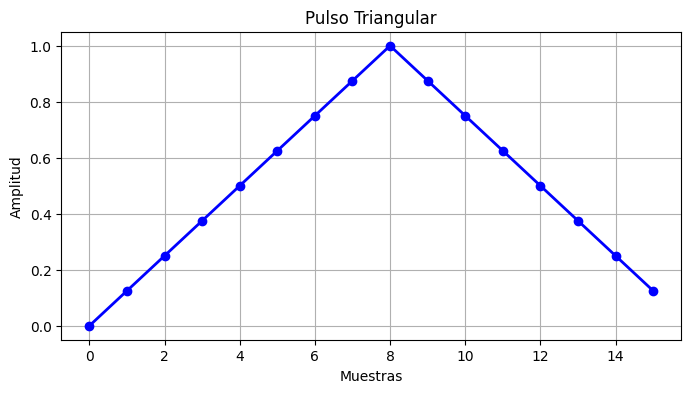

In [ ]:
def pulso_triangular(X):
    # Creamos un vector de tiempo de 0 a X-1
    t = np.arange(X)

    b = 0 if X % 2 == 0 else 0.5
    t2 = t + b

    simetria = 0.5
    pulso = signal.sawtooth(2 * np.pi * (1/X) * (t2), 0.5) / 2 + 0.5

    descarte = int(np.ceil((M-1)/2))
    return t, pulso, descarte

p_triangular = pulso_triangular(M)
t, p_k, dscr = p_triangular

plt.figure(figsize=(8, 4))
plt.plot(t, p_k, 'b-', marker= 'o', linewidth=2)
plt.title('Pulso Triangular')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

  3. Pulso seno.

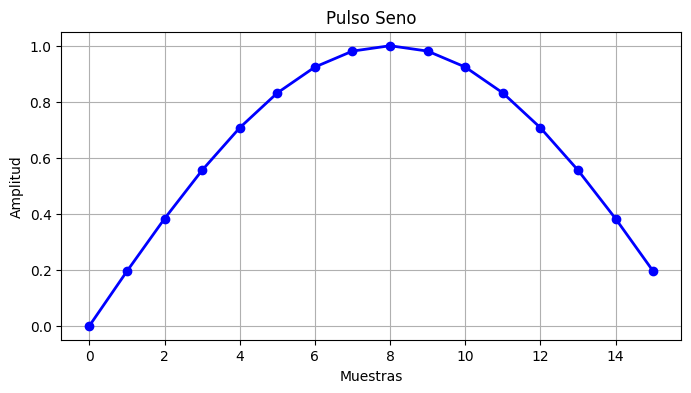

In [ ]:
def pulso_seno(X):

    if X % 2 == 0 : # es par
        t = np.linspace(0, np.pi, X + 1 ) # Genera un vector de tiempo de 0 a 2*pi con X muestras

        t2 = np.arange(X)

        pulso = np.sin(t)[:-1]  # Genera el pulso seno
    else :
        t = np.linspace(0, np.pi, X + 2)  # Genera un vector de tiempo de 0 a 2*pi con X muestras
        pulso = np.cos(t)  # Genera el pulso coseno

        t2 = np.arange(X)
        m= (int)(X/2) + 1
        pulso = pulso[:m]

        pulso = np.concatenate((np.flip(pulso[1:]), pulso))

    descarte = int(np.ceil((M-1)/2))
    return t2, pulso, descarte


p_seno = pulso_seno(M)
t, p_k, dscr = p_seno

plt.figure(figsize=(8, 4))
plt.plot(t, p_k, 'b-', marker= 'o', linewidth=2)
plt.title('Pulso Seno')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

4. Pulso coseno elevado.

      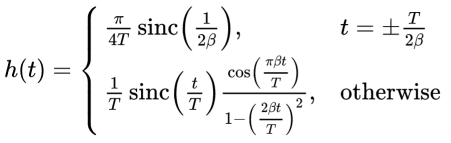

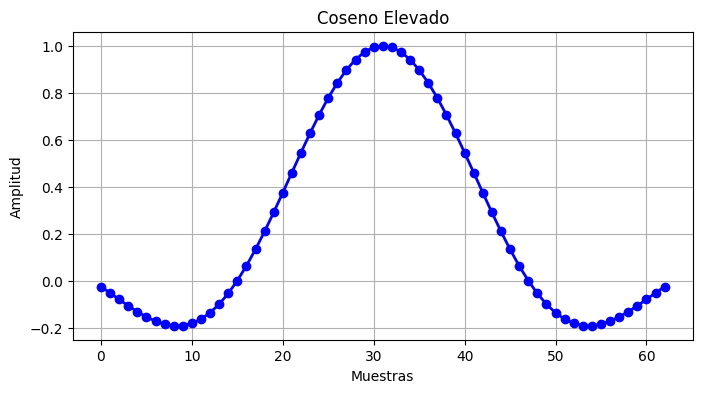

In [ ]:
def pulso_coseno_elevado(X, beta, factor): # X es el numero de muestras por simbolo; factor es el factor multiplicativo (potencia de 2)

    num_taps = X * factor - 1
    t = np.arange(num_taps) - (num_taps-1)//2
    t2 = np.arange(num_taps)
    pulso = np.sinc(t/X) * (np.cos(np.pi*beta*t/X) / (1 - (2*beta*t/X)**2) )

    descarte = int((np.ceil(M-1/2)) * 2 - 1)

    return t2, pulso, descarte


p_coseno_elevado = pulso_coseno_elevado(X = M, beta = 0.25, factor = 4) # factor es la cantidad de muestras total del coseno elevado
t, p_k, dscr = p_coseno_elevado

plt.figure(figsize=(8, 4))
plt.plot(t, p_k, 'b-', marker= 'o', linewidth=2)
plt.title('Coseno Elevado')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

- La señal `x` es la señal a transmitir por el canal, se obtiene mediante la convolución entre `d` y `p`, o de manera equivalente realizando el filtrado de `d` mediante el filtro FIR de coeficientes `p`.

In [ ]:

t, p_k, dscr = p_cuadrado
t, p_k, dscr = p_triangular
# t, p_k, dscr = p_seno
# t, p_k, dscr = p_coseno_elevado

x_k = np.convolve(d_k, p_k, mode='full')

En cualquier caso es importante descartar los primeros $\frac{L_p-1}{2}$ valores, para que las señales `d` y `x` queden "sincronizadas".

In [ ]:
x_k = x_k[dscr:]

n_y = np.arange(len(x_k))

- El filtro `h` representa al canal y en este caso será un canal ideal, es decir, tendrá una única delta en 0.

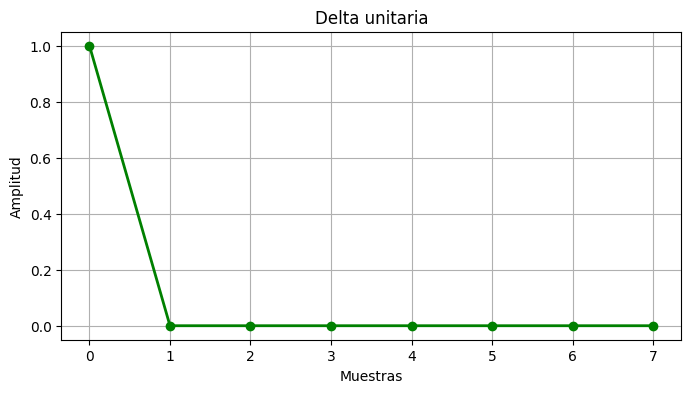

In [ ]:
def delta_unitaria(n):
    delta = np.zeros(n)
    t = np.arange(n)
    delta[0] = 1
    return t, delta

n = 8
t, h_k = delta_unitaria(n)

plt.figure(figsize=(8, 4))
plt.plot(t, h_k, 'g-', marker= 'o', linewidth=2)
plt.title('Delta unitaria')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

  - La señal `n` representa a ruido blanco gaussiano aditivo (AWGN) del canal. Se lo caracterizará por su varianza: $\sigma^2 = N_0$ (Modulación en banda base).

In [ ]:
N0 = 0.01  # Varianza del ruido

# Ruido blanco gaussiano aditivo (AWGN) para la convolucion x[k] * h[k]
awgn = np.random.normal(loc=0, scale=np.sqrt(N0), size= len(x_k)+len(h_k)-1)

2. Graficar las señales `d`, `x` y `c` superpuestas en un mismo gráfico.
    Realice el gráfico para cada pulso del punto anterior.
    Verificar que las deltas coinciden con los picos de los pulsos, inclusive
    para el coseno elevado.
    Para este punto utilizar pocos datos para la secuencia binaria,
    no más de 20, para que se puedan observar bien los datalles de la señal
    generada.

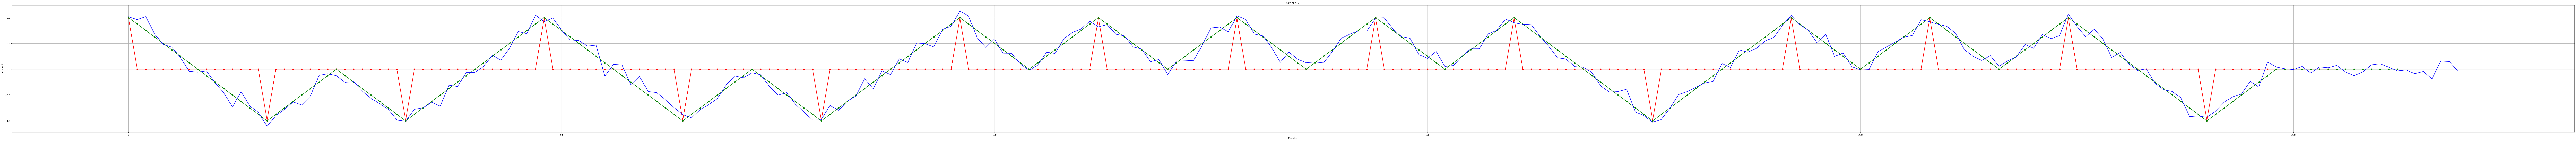

In [ ]:
signal_d = d_k
signal_x = x_k
xh_k = np.convolve(x_k, h_k, mode='full')
signal_c = xh_k + awgn


plt.figure(figsize=(200, 10))
plt.plot(np.arange(len(signal_d)), signal_d, 'r-', marker= 'o', linewidth=2)
plt.plot(np.arange(len(signal_x)), signal_x, 'g-', marker= 'o', linewidth=2)
plt.plot(np.arange(len(signal_c)), signal_c, 'b-', marker= '', linewidth=2)
plt.title('Señal d[k]')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

3. Graficar la densidad espectral de las señales `x` y `c` del punto anterior
    en escala semilogaritmica. A diferencia del punto 1, dónde los pulsos tenían un pico de altura 1, para este caso se deben normalizar los pulsos para que tengan energía igual a 1. Para ello dividir al pulso por su energía utilizando la siguiente ecuación:

    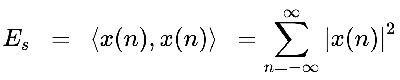
    
    Aclaración: Se debe notar que la señal que se transmite es una señal de
    tiempo continuo y por lo tanto, el cálculo del espectro deberíamos hacerlo
    en ese dominio y lo mismo con el cálculo de la energía.
    Además se debería considerar el tipo de interpolación del DAC.
    En este ejercicio estamos haciendo una aproximación del espectro y de la
    energía del pulso, a partir de la versión muestreada.

    Para el calculo de espectro utilizar de 1000 a 10000 datos para la
    secuencia binaria, para que que la aproximación tenga mejor
    resolución.


4. Suba el script a la carpeta de entrega. (**Completado**)

5. Complete el archivo `README.md` con los gráficos del punto 2 y 3.


### Entrega

El script de simulación se debe agregar al repositorio, en la carpeta de
entrega correspondiente.

Asimismo, en la misma carpeta, se debe agregar un archivo `README.md` que
contenga las capturas de la simulación y una breve explicación de lo que se
está mostrando en cada caso.
Este archivo debe contener las instrucciones para ejecutar el script.
